# Example: Visualizing COCO Person Keypoints
---

Please download keypoints annotation from http://cocodataset.org/#download

In [1]:
import io
import requests

import numpy as np
from PIL import Image
from pycocotools.coco import COCO

import visdets
from visdets.skeletons import COCOHumanSkeletonStyle


def load_image_url(url):
    res = requests.get(url)
    return Image.open(io.BytesIO(res.content))

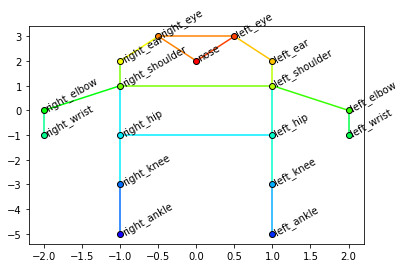

In [2]:
coco_skeleton_style = COCOHumanSkeletonStyle()
coco_skeleton_style.visualize_skeleton()

In [3]:
coco = COCO('data/coco_annotations/person_keypoints_val2017.json')

loading annotations into memory...
Done (t=0.28s)
creating index...
index created!


In [4]:
catIds = coco.getCatIds(catNms=['person'])
imgIds = sorted(coco.getImgIds(catIds=catIds))[:5]
imgs = coco.loadImgs(ids=imgIds)

pil_imgs = [load_image_url(img['coco_url']) for img in imgs]

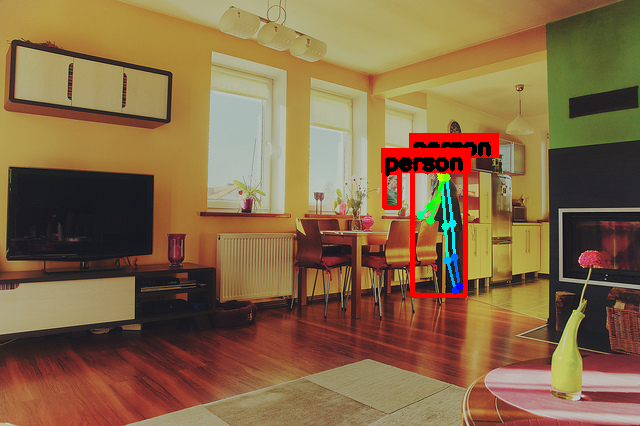

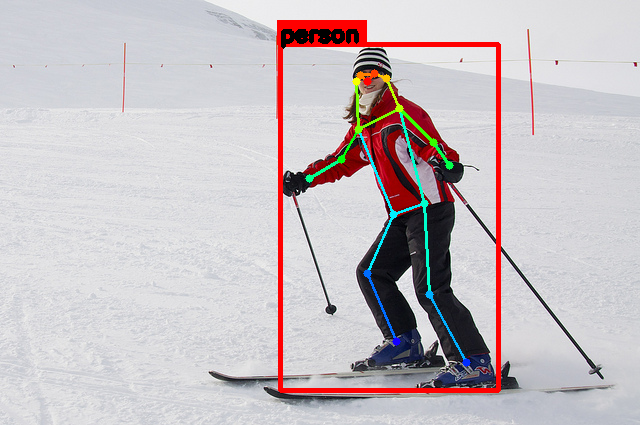

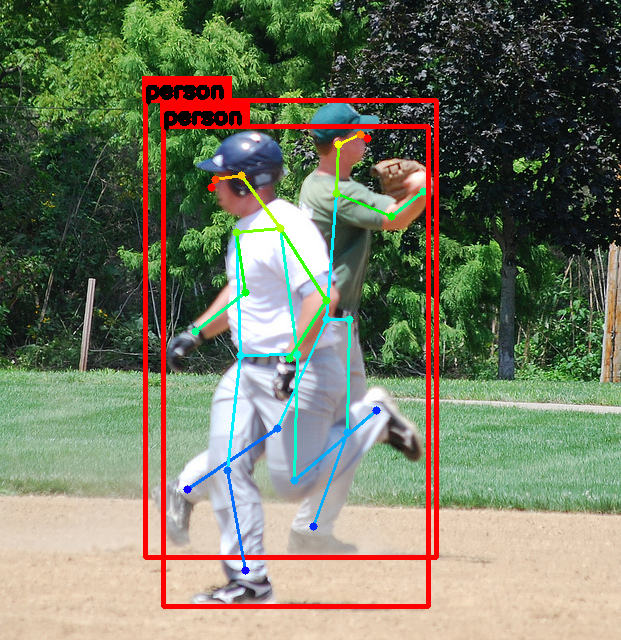

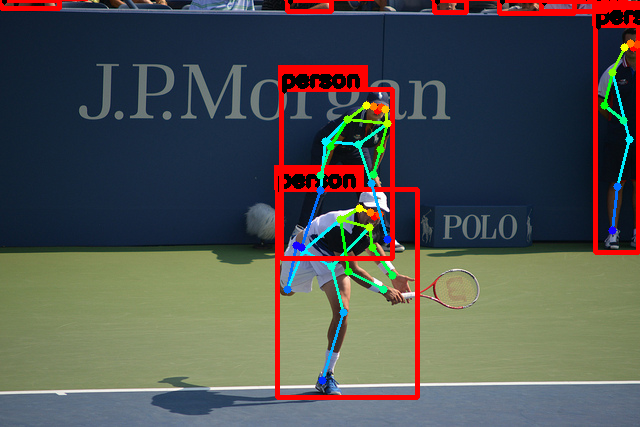

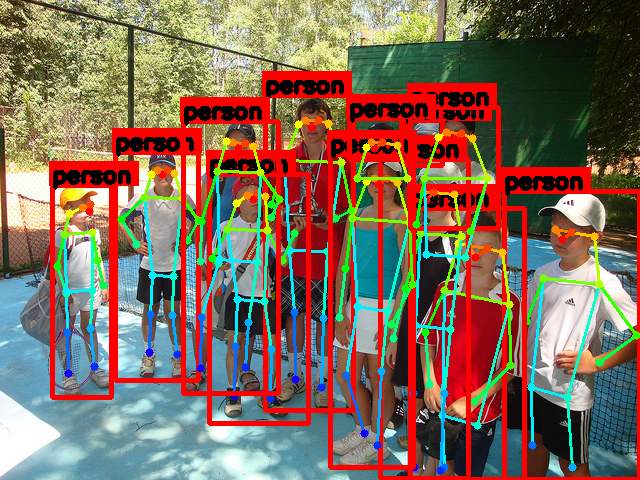

In [5]:
for i, imgId in enumerate(imgIds):
    annIds = sorted(coco.getAnnIds(imgIds=[imgId], catIds=catIds))
    anns = coco.loadAnns(ids=annIds)
    pil_img = pil_imgs[i]
    
    img_out = np.array(pil_img)
    for ann in anns:
        x, y, w, h = map(int, ann['bbox'])
        keypoints = np.array(ann['keypoints']).reshape(-1, 3)
    
        visdets.draw_bbox(img_out, x, y, w, h,
                          facecolor=(255, 0, 0), label='person', fontScale=0.75)
        visdets.draw_keypoint(img_out, keypoints[:, :2], keypoints[:, 2],
                              coco_skeleton_style, marker_size=4)
    
    img_out = Image.fromarray(img_out)
    display(img_out)